### IMAGE GENERATION
- Diffuser models are more suitable for Image/audio/text generation tasks. Whereas transformer models are more suitable for NLP tasks, text/img generation
- Uses Stable Diffusion model at https://huggingface.co/runwayml/stable-diffusion-v1-5 which is a text to image diffusion model

In [14]:
import os
import io
from IPython.display import display
from PIL import Image
import base64
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())
hf_api_key = os.environ['HF_API_KEY']

In [23]:
text = "A man contemplating amidst mountains and lakes"
text = "A beautiful rainy day in the woods by the river"
text = "A golden retriever dog in the park"

In [29]:
import requests, json

def img_gen(text, api_url = os.environ['HF_IMG_GEN_API_URL']):
    headers = {
        "Authorization": f"Bearer {hf_api_key}",
        "Content-Type" : "application/json"
    }

    params = {
        "negative_prompt" : "low quality",
        "num_inference_steps": 100, # #of steps denoiser denoise the image 0-100
        "guidance_scale": 7, # Controls how much text prompt influences the result 0-10
        "width":512, # Max 512
        "height":512 # Max 512
    }

    data = {
        "inputs": text,
        "parameters": params
    }


    response = requests.post(api_url, headers=headers, data=json.dumps(data))
    display(Image.open(io.BytesIO(response.content)))

In [ ]:
# Running locally
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
image = Image.open(io.BytesIO(pipe(text)))

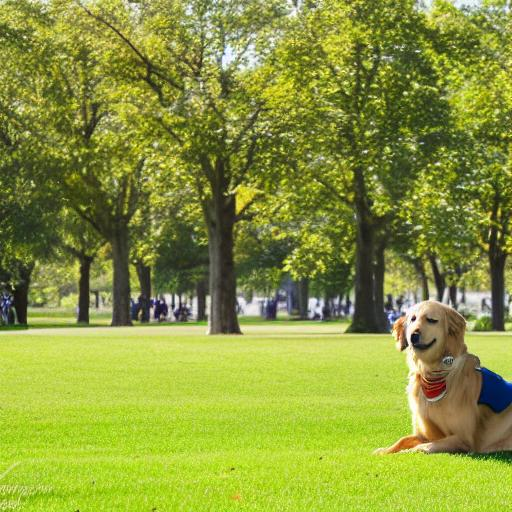

In [30]:
img_gen(text)
#display(image)